In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numba import njit

**RNN without learning**

In this Notebook, we will explore RNN in Neuroscience without learning. The following equation will be use :

$\mathbf{F(x)} = -\vec{x} + \sigma[\mathbf{W}\vec{x}-\mu]$

Where $\sigma$ is the sigmoid function : $\sigma(x) = \frac{1}{(1+e^{-x})}$.

To solve those differentials equations, we will use Runge Kutta of fourth order. NUMBA will also be added to reduce our computation time.

In [35]:
def dydx(t,x,W, sigma, mu):
    return -x + sigma(W @ x - mu)

def RK4(t, IC, dydx, W, sigma=lambda x: ((1+np.exp(-x))**(-1)), mu=0):
    '''Approximate differential equation with RK methods for matrices
    -----------------------
    t : time array (np.linspace)
    IC : initial condition (in array -> line)
    dydx : Function
    W : Weight matrix
    sigma : Activation function (sigmoid if unspecified)
    mu : Activation threshold (0 if unspecified)
    ----------------------
    '''
    n = len(IC)
    m = len(t)
    res = np.zeros((m, n))   #mxn matrix that contain our values
    res[0] = IC  # First line is redefine
    dt = (t[-1] - t[0])/m
    for i in range(1, m):
        k1 = dt * dydx(t[i-1], res[(i-1)], W=W, sigma=sigma, mu=mu)
        k2 = dt * dydx(t[i-1] + 0.5 * dt, res[(i-1)] + 0.5 * k1, W=W, sigma=sigma, mu=mu)
        k3 = dt * dydx(t[i-1] + 0.5 * dt, res[(i-1)] + 0.5 * k2, W=W, sigma=sigma, mu=mu)
        k4 = dt * dydx(t[i-1] + dt, res[(i-1)] + k3, W=W, sigma=sigma, mu=mu)
        res[i] = res[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return res

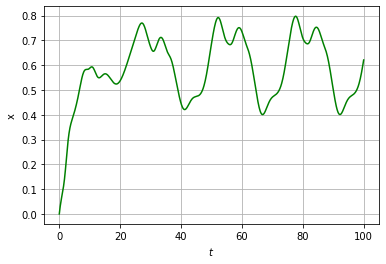

In [143]:
t = np.linspace(0, 100, 1000)
IC_liste = [0] * 100
IC = np.array(IC_liste)
#W = np.random.randn(2, 2)
W = np.array([[1, 5, 7],[3, 1, 7], [1, -2, 0]])
W = np.random.randn(100, 100)

x = RK4(t=t, IC=IC, W=W, dydx=dydx, mu=2)
x1 = x[:,0]
x2 = x[:,1]
x3 = x[:,2]
x4 = x[:,88]

#plt.plot(t, x1, "r-")
#plt.plot(t, x2, "b-")
plt.plot(t, x4, "g-")
plt.grid(True)
plt.xlabel(r"$t$")
plt.ylabel(r"x")
plt.show()